# Social_Netwrok_Ads Analysis

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [3]:
# Load the dataset
data = pd.read_csv("Social_Network_Ads.csv")

In [4]:
# The code below prints the first few rows of the dataframe 'data'
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# The code below retrieves the shape of the dataframe 'data'
data.shape

(400, 5)

In [6]:
# The code below retrieves the total number of elements in the dataframe 'data'
data.size

2000

In [7]:
# The code below provides concise summary information about the dataframe 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
# The code below generates descriptive statistics for the dataframe 'data'
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Demographic Analysis

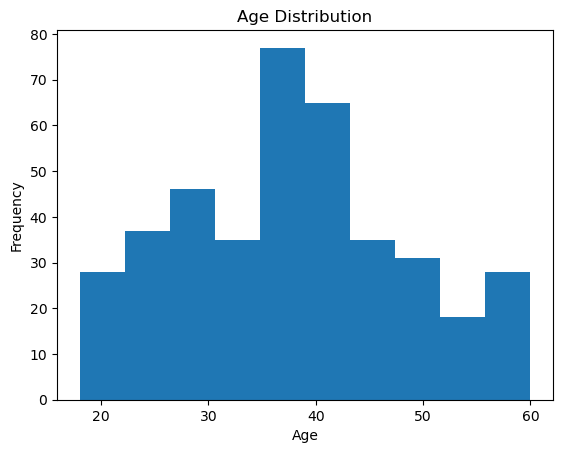

In [9]:
# Age distribution
data['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)  # Remove grid lines
plt.show()

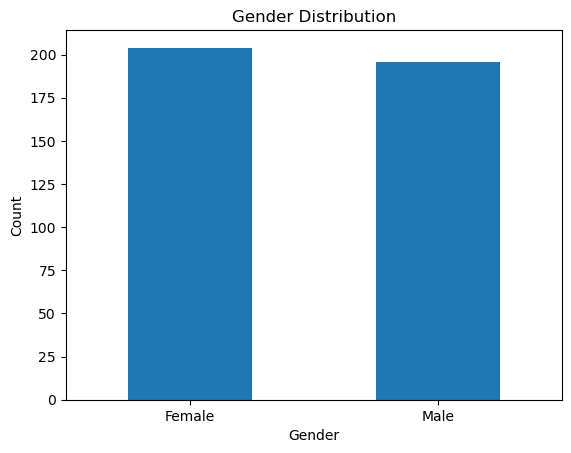

In [10]:
# Gender distribution
data['Gender'].value_counts().plot(kind='bar', rot=0)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Incom Analysis

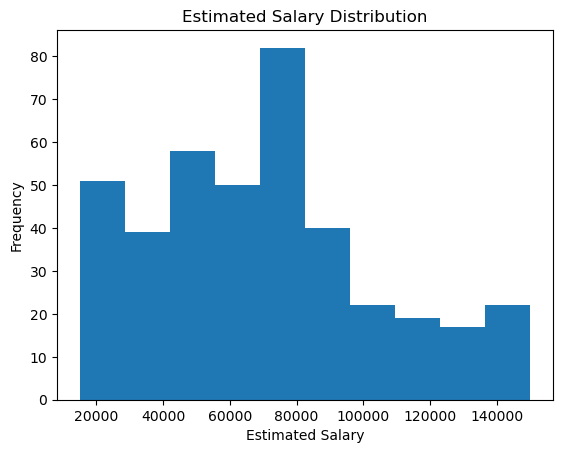

In [11]:
# The code below creates a histogram of the 'EstimatedSalary' column in the dataframe 'data'
data['EstimatedSalary'].hist()

# Adding title to the histogram
plt.title('Estimated Salary Distribution')

# Adding label to the x-axis
plt.xlabel('Estimated Salary')

# Adding label to the y-axis
plt.ylabel('Frequency')

# Turning off grid lines
plt.grid(False)

# Displaying the histogram
plt.show()

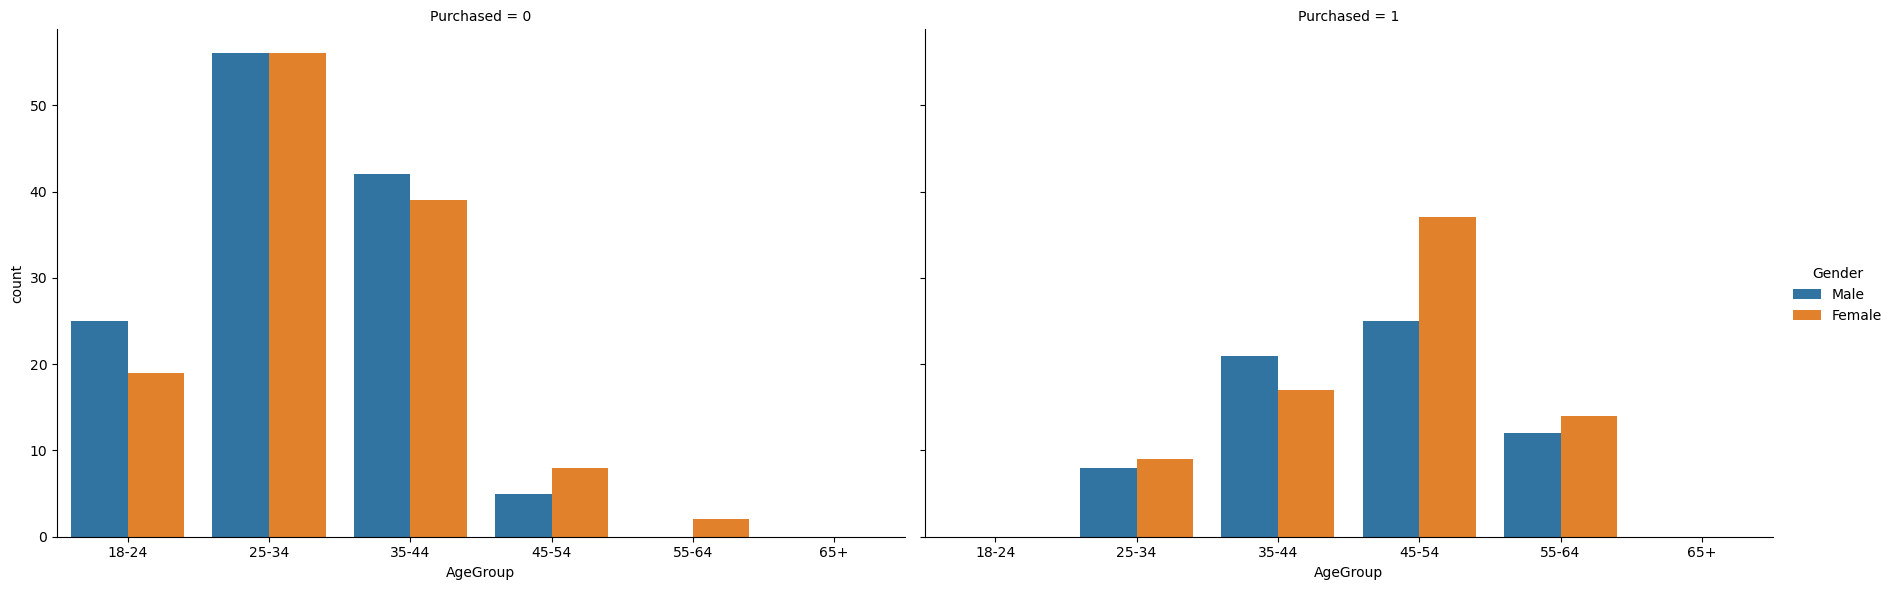

In [12]:
# Define age bins
age_bins = [18, 25, 35, 45, 55, 65, np.inf]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Bin 'Age' column into intervals
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Plot purchasing behavior by age group and gender
sns.catplot(x='AgeGroup', hue='Gender', col='Purchased', data=data, kind='count', height=6, aspect=1.5)
plt.show()

In [13]:
X = data.drop(columns=['User ID', 'Purchased'])  # Drop User ID as it's not useful for modeling
y = data['Purchased']

In [14]:
# Perform one-hot encoding for the 'Gender' column
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [15]:
#Show first five rows of new dataframe
data_encoded.head()

,User ID,Age,EstimatedSalary,Purchased,AgeGroup,Gender_Male
0,15624510,19,19000,0,18-24,True
1,15810944,35,20000,0,25-34,True
2,15668575,26,43000,0,25-34,False
3,15603246,27,57000,0,25-34,False
4,15804002,19,76000,0,18-24,True


In [16]:
# Convert boolean values to integers in the 'Gender' column
data_encoded['Gender_Male'] = data_encoded['Gender_Male'].astype(int)

In [17]:
#Show first five rows of dataframe
data_encoded.head()

,User ID,Age,EstimatedSalary,Purchased,AgeGroup,Gender_Male
0,15624510,19,19000,0,18-24,1
1,15810944,35,20000,0,25-34,1
2,15668575,26,43000,0,25-34,0
3,15603246,27,57000,0,25-34,0
4,15804002,19,76000,0,18-24,1


In [18]:
# Specify x and y
X = data_encoded[['Gender_Male', 'Age', 'EstimatedSalary']]
y = data_encoded['Purchased']

In [19]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [22]:
# Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')  # You can experiment with different kernels
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)

In [23]:
# Train Gradient Boosting model
gradboost_pca = GradientBoostingClassifier()
gradboost_pca.fit(X_train_pca, y_train)

gradboost_kpca = GradientBoostingClassifier()
gradboost_kpca.fit(X_train_kpca, y_train)

# Predictions
y_pred_pca_gb = gradboost_pca.predict(X_test_pca)
y_pred_kpca_gb = gradboost_kpca.predict(X_test_kpca)

# Evaluation Metrics

In [24]:
# Evaluate models
accuracy_pca_gb = accuracy_score(y_test, y_pred_pca_gb)
accuracy_kpca_gb = accuracy_score(y_test, y_pred_kpca_gb)

In [25]:
print("Accuracy with PCA:", accuracy_pca_gb)
print("Accuracy with kPCA:", accuracy_kpca_gb)

Accuracy with PCA: 0.825
Accuracy with kPCA: 0.925


In [26]:
# Evaluate PCA model
print("Evaluation metrics for PCA:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca_gb))

Evaluation metrics for PCA:
Confusion Matrix:
[[48  4]
 [10 18]]


Evaluation metrics for PCA:
Confusion Matrix:
[[48  4]
 [10 18]]


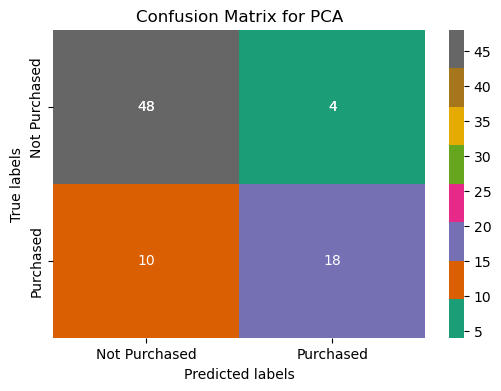

In [27]:
# Define labels for clarity
labels = ['Not Purchased', 'Purchased']

# Function to dynamically adjust font color based on background color
def get_text_color(value):
    return 'white' if value < 50 else 'black'  # Adjust the threshold as needed

# Evaluate PCA model
print("Evaluation metrics for PCA:")
print("Confusion Matrix:")
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca_gb)
print(conf_matrix_pca)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_pca, annot=True, cmap='Dark2', fmt='g', cbar=True, xticklabels=labels, yticklabels=labels)
# Manually annotate the heatmap with values and adjust font color
for i in range(len(conf_matrix_pca)):
    for j in range(len(conf_matrix_pca[i])):
        plt.text(j+0.5, i+0.5, str(conf_matrix_pca[i][j]),\
        ha='center', va='center', fontsize=10, color=get_text_color(conf_matrix_pca[i][j]))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for PCA')
plt.show()


Evaluation metrics for kPCA:
Confusion Matrix:
[[48  4]
 [ 2 26]]


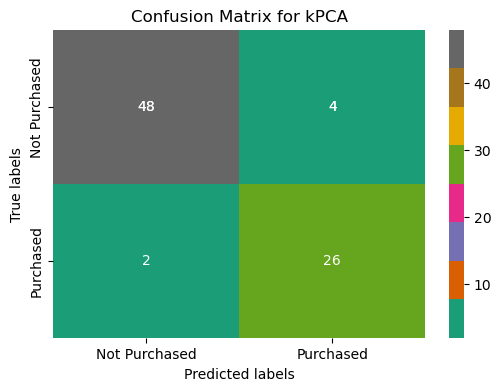

In [28]:
# Evaluate KPCA model
print("\nEvaluation metrics for kPCA:")
print("Confusion Matrix:")
conf_matrix_kpca = confusion_matrix(y_test, y_pred_kpca_gb)
print(conf_matrix_kpca)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_kpca, annot=True, cmap='Dark2', fmt='g', cbar=True, xticklabels=labels, yticklabels=labels)
# Manually annotate the heatmap with values and adjust font color
for i in range(len(conf_matrix_kpca)):
    for j in range(len(conf_matrix_kpca[i])):
        plt.text(j+0.5, i+0.5, str(conf_matrix_kpca[i][j]),\
        ha='center', va='center', fontsize=10, color=get_text_color(conf_matrix_kpca[i][j]))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for kPCA')
plt.show()

In [29]:
#Evaluate PCA model
print("F1 Score:", f1_score(y_test, y_pred_pca_gb))
print("Precision Score:", precision_score(y_test, y_pred_pca_gb))
print("Recall Score:", recall_score(y_test, y_pred_pca_gb))

print("----------------------")

# Evaluate KPCA model
print("F1 Score:", f1_score(y_test, y_pred_kpca_gb))
print("Precision Score:", precision_score(y_test, y_pred_kpca_gb))
print("Recall Score:", recall_score(y_test, y_pred_kpca_gb))


F1 Score: 0.7200000000000001
Precision Score: 0.8181818181818182
Recall Score: 0.6428571428571429
----------------------
F1 Score: 0.896551724137931
Precision Score: 0.8666666666666667
Recall Score: 0.9285714285714286
